### Assignment

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
* Create a `draw_box_plot` function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

For each chart, make sure to use a copy of the data frame. Unit tests are written for you under `test_module.py`.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [3]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe30b115790>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe30b115e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe30b115430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe30b12b550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe30b12b8b0>],
 'means': []}

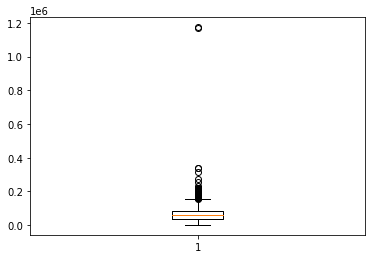

In [5]:
plt.boxplot(df)

In [6]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [7]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe30b2cfbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe30b2dd2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe30b2cf850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe30b2dd970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe30b2ddcd0>],
 'means': []}

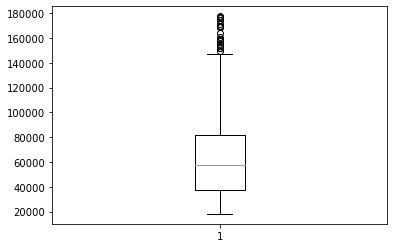

In [8]:
plt.boxplot(df)

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

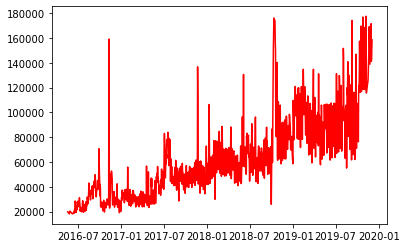

In [9]:
fig, ax = plt.subplots()
ax.plot(df, color='r')
plt.show()

* plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
* plt.plot(x, x**2, label='quadratic')  # etc.
* plt.plot(x, x**3, label='cubic')
* plt.xlabel('x label')
* plt.ylabel('y label')
* plt.title("Simple Plot")
* plt.legend()

In [10]:
fig.set_figwidth(16)

In [11]:
fig.set_figheight(4)

In [12]:
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [13]:
ax.set_xlabel('Date')

Text(0.5, 3.1999999999999993, 'Date')

In [14]:
ax.set_ylabel('Page Views')

Text(3.200000000000003, 0.5, 'Page Views')

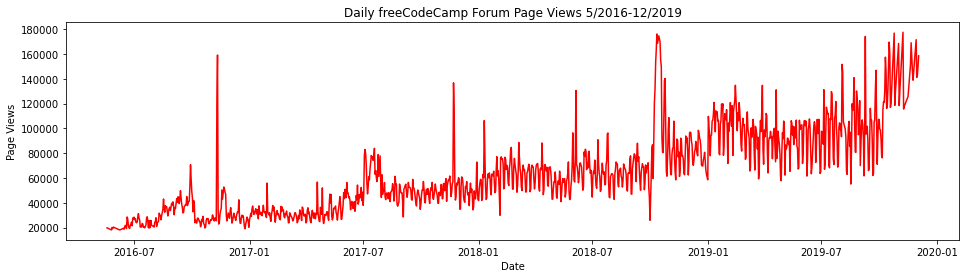

In [15]:
fig

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [16]:
df_bar = df.reset_index()

In [17]:
df_bar.head()

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325


In [18]:
df_bar['year'] = df_bar['date'].dt.year

In [19]:
df_bar.head()

,date,value,year
0,2016-05-19,19736,2016
1,2016-05-26,18060,2016
2,2016-05-27,19997,2016
3,2016-05-28,19044,2016
4,2016-05-29,20325,2016


In [20]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [21]:
df_bar['month'] = df_bar['date'].dt.month_name()

In [22]:
df_bar.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


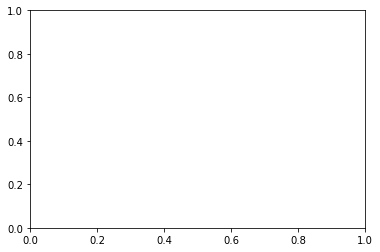

In [23]:
fig, ax = plt.subplots()

In [24]:
df_bar.groupby(df_bar['date'].dt.to_period('M')).sum()

,value,year
date,,
2016-05,97162,10080
2016-06,415627,38304
2016-07,675071,56448
2016-08,962525,62496
2016-09,1244306,60480
2016-10,849348,62496
2016-11,1213459,60480
2016-12,862805,62496
2017-01,1016340,62527


In [25]:
df_bar.groupby(df_bar['date'].dt.to_period('Y')).sum()

,value,year
date,,
2016,6320303,413280
2017,15736295,736205
2018,25184051,730516
2019,30827814,617814


In [26]:
df_bar

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,November
1234,2019-11-29,171584,2019,November
1235,2019-11-30,141161,2019,November
1236,2019-12-01,142918,2019,December


<AxesSubplot:xlabel='year', ylabel='value'>

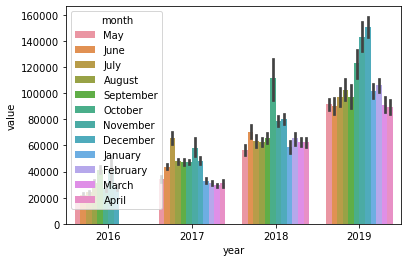

In [27]:
sns.barplot(data=df_bar, y='value', x='year', hue='month')

def mapper(month):
   return month.strftime('%b') 

df['Month'] = df['Month'].apply(mapper)

<AxesSubplot:xlabel='year'>

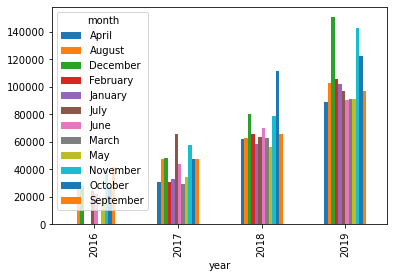

In [28]:
df_bar.pivot_table(index='year', columns='month', values='value').plot.bar()

In [29]:
month_dict = {1 : "January", 2 : "February", 3 : "March", 4 : "April", 
              5 : "May" , 6 : "June", 7 : "July", 8 : "August", 
              9 : "September", 10 : "October" ,11 : "November",12 : "December"}

In [30]:
df_bar['month'] = df_bar['date'].dt.month

In [31]:
df_bar

,date,value,year,month
0,2016-05-19,19736,2016,5
1,2016-05-26,18060,2016,5
2,2016-05-27,19997,2016,5
3,2016-05-28,19044,2016,5
4,2016-05-29,20325,2016,5
...,...,...,...,...
1233,2019-11-24,138875,2019,11
1234,2019-11-29,171584,2019,11
1235,2019-11-30,141161,2019,11
1236,2019-12-01,142918,2019,12


<AxesSubplot:xlabel='year'>

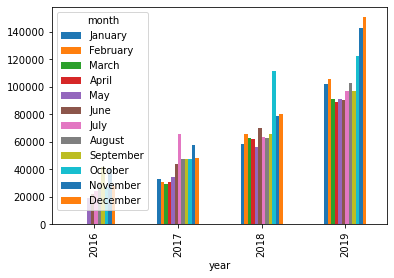

In [32]:
df_bar.pivot_table(index='year', columns='month', values='value').rename(columns=month_dict).plot.bar()

In [33]:
df_bar = df_bar.pivot_table(index='year', columns='month', values='value').rename(columns=month_dict)

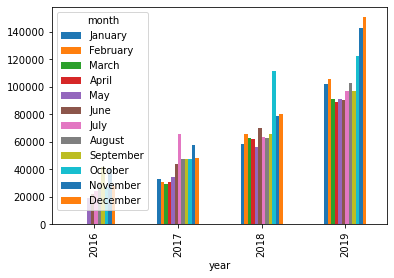

In [34]:
ax = df_bar.plot.bar()

In [35]:
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

Text(3.200000000000003, 0.5, 'Average Page Views')

In [36]:
fig = ax.get_figure()

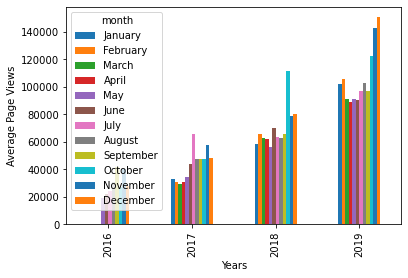

In [37]:
fig

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly

In [38]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [39]:
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [40]:
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


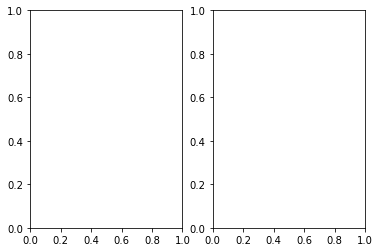

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2)

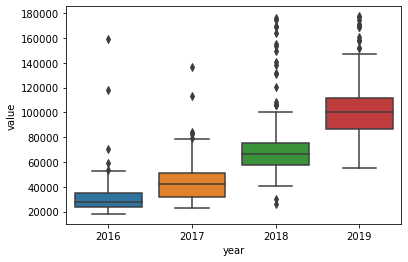

In [42]:
ax1 = sns.boxplot(x="year", y="value", data=df_box)

In [43]:
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Years')
ax1.set_ylabel('Average Page Views')

Text(17.200000000000003, 0.5, 'Average Page Views')

In [44]:
fig = ax1.get_figure()

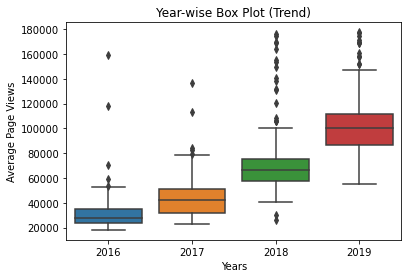

In [45]:
fig

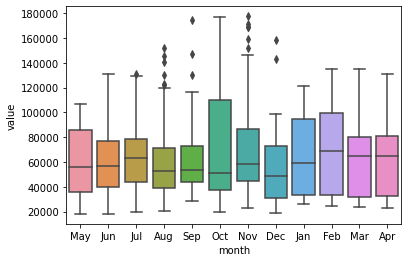

In [46]:
ax2 = sns.boxplot(x="month", y="value", data=df_box)

In [47]:
fig = ax1.get_figure()

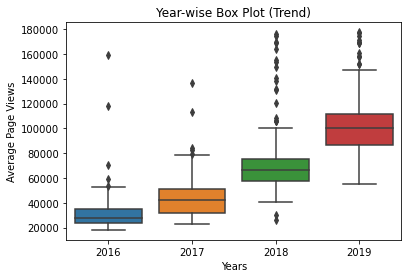

In [48]:
fig

In [49]:
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Months')
ax2.set_ylabel('Average Page Views')

Text(17.200000000000003, 0.5, 'Average Page Views')

In [50]:
fig = ax2.get_figure()

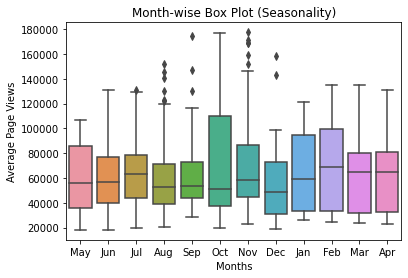

In [51]:
fig

In [52]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [53]:
fig = plt.gcf()

<Figure size 432x288 with 0 Axes>

In [54]:
fig

<Figure size 432x288 with 0 Axes>